# Classification - Logistic Regression with Kfold CV and Regularization

In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [2]:
data_default = pd.read_csv("Data/Default.csv")
data_default.drop(['Unnamed: 0'], axis = 1, inplace = True)
data_default.head(5)

,default,student,balance,income
0,No,No,729.526495,44361.62507
1,No,Yes,817.180407,12106.13470
2,No,No,1073.549164,31767.13895
3,No,No,529.250605,35704.49394
4,No,No,785.655883,38463.49588


In [3]:
data_default_dummies = pd.get_dummies(data_default, drop_first = True)
data_default_dummies.head(5)

,balance,income,default_Yes,student_Yes
0,729.526495,44361.62507,0,0
1,817.180407,12106.13470,0,1
2,1073.549164,31767.13895,0,0
3,529.250605,35704.49394,0,0
4,785.655883,38463.49588,0,0


In [4]:
X = data_default_dummies.drop(['default_Yes'], axis = 1)
y = data_default_dummies['default_Yes']
y = y.values

In [5]:
X_Train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 4)

In [6]:
print("Train feature set shape: %s, Test feature set shape: %s " % (X_Train.shape, X_test.shape))
print("Train set labels shape: %s, Test set labels shape: %s " % (y_train.shape, y_test.shape))

Train feature set shape: (8000, 3), Test feature set shape: (2000, 3) 
Train set labels shape: (8000,), Test set labels shape: (2000,) 


In [7]:
c_param_list = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

score_results = []

for val in c_param_list:
    log_reg = LogisticRegression(penalty = 'l2', C = val, solver = 'lbfgs')
    kfold = KFold(n_splits=10)
    score = cross_val_score(log_reg, X_Train, y_train, cv = kfold, scoring = "accuracy")
    score_results.append(score)
    print("C val: %s, CV Score Avg: %s " % (val, np.mean(score)))

C val: 0.0001, CV Score Avg: 0.9703750000000001 
C val: 0.001, CV Score Avg: 0.9701250000000001 
C val: 0.01, CV Score Avg: 0.9690000000000001 
C val: 0.1, CV Score Avg: 0.9670000000000002 
C val: 1, CV Score Avg: 0.9664999999999999 
C val: 10, CV Score Avg: 0.9664999999999999 
C val: 100, CV Score Avg: 0.9668749999999999 
C val: 1000, CV Score Avg: 0.9668749999999999 


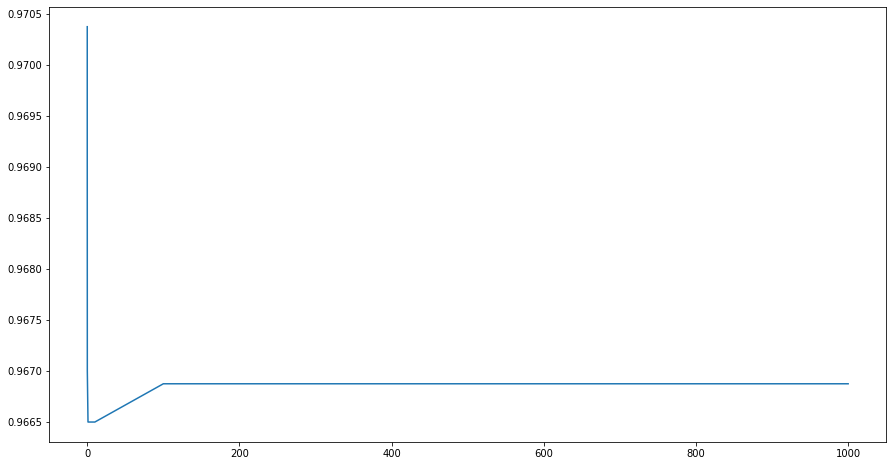

In [8]:
plt.figure(figsize = (15,8)) 
plt.plot(c_param_list, np.mean(np.array(score_results), axis = 1))
plt.show()

Check that maximum accuracy score is recorded at front part of the plot.

In [9]:
avg_cv_scores = np.mean(np.array(score_results), axis = 1)
max_avg_accuracy_index = np.argmax(avg_cv_scores) #Get the index of element that comprises to max accuracy score
print("Optimal Value of C: %s" % c_param_list[max_avg_accuracy_index]) #Note: So optimal lambda=1/C

Optimal Value of C: 0.0001


In [10]:
log_reg_optimal = LogisticRegression(penalty = 'l2', C = 0.0001, solver = 'lbfgs')
opt_mod_log_reg = log_reg_optimal.fit(X,y)
log_reg_optimal.fit(X,y)

print("β1=%s, β2=%s, β3=%s" % tuple(opt_mod_log_reg.coef_.ravel()))
print("β0=%s" % opt_mod_log_reg.intercept_[0])
print("Model Score: %s" % opt_mod_log_reg.score(X,y))

y_pred = opt_mod_log_reg.predict(X)
pred_prob = opt_mod_log_reg.predict_proba(X)

β1=0.005644304791233047, β2=2.0763972555154016e-05, β3=-0.0011376926980435336
β0=-11.53407143326959
Model Score: 0.9737


In [11]:
print(classification_report(y, y_pred, digits = 6))

              precision    recall  f1-score   support

           0   0.977167  0.996069  0.986527      9667
           1   0.739726  0.324324  0.450939       333

    accuracy                       0.973700     10000
   macro avg   0.858446  0.660197  0.718733     10000
weighted avg   0.969260  0.973700  0.968692     10000



#### Note: If you compare the classification reports of LR models with and withhout regularization application, you can see that we have a little bit improved precision and recall scores for class 1 predictions when we use regularization.